<a href="https://colab.research.google.com/github/Jeetendra-Shakya/Image_classification_CNN/blob/main/Image_Classification_for_cotton_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Convolutional Neural Network

In [5]:
# This model was created using google colab:
# To check your GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Apr 28 06:59:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    34W / 250W |    351MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
# Tensorflow GPU

import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [9]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
tf.__version__

'2.4.1'

In [11]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_Disease/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_Disease/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [13]:
from tensorflow.keras.layers import Conv2D

In [14]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [19]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
61/61 [==============================] - 22s 350ms/step - loss: 0.0393 - accuracy: 0.9858 - val_loss: 0.2097 - val_accuracy: 0.9434
Epoch 2/50
61/61 [==============================] - 21s 347ms/step - loss: 0.0132 - accuracy: 0.9968 - val_loss: 0.3351 - val_accuracy: 0.9434
Epoch 3/50
61/61 [==============================] - 21s 346ms/step - loss: 0.0381 - accuracy: 0.9820 - val_loss: 0.1674 - val_accuracy: 0.9434
Epoch 4/50
61/61 [==============================] - 21s 340ms/step - loss: 0.0287 - accuracy: 0.9900 - val_loss: 0.1975 - val_accuracy: 0.9340
Epoch 5/50
61/61 [==============================] - 21s 350ms/step - loss: 0.0317 - accuracy: 0.9921 - val_loss: 0.2829 - val_accuracy: 0.9245
Epoch 6/50
61/61 [==============================] - 21s 343ms/step - loss: 0.0205 - accuracy: 0.9944 - val_loss: 0.3235 - val_accuracy: 0.9340
Epoch 7/50
61/61 [==============================] - 21s 347ms/step - loss: 0.0249 - accuracy: 0.9903 - val_loss: 0.1574 - val_accuracy: 0.9623

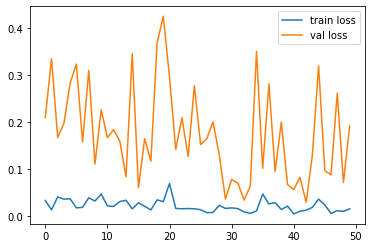

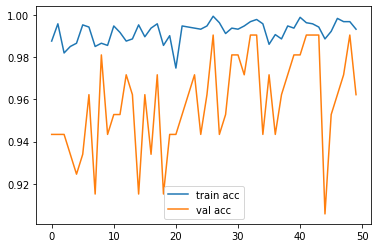

<Figure size 432x288 with 0 Axes>

In [20]:
# Plot loss and accuracy

import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_cnn')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_cnn')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_cotton_disease_cnn.h5')

In [23]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_cotton_disease_cnn.h5')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [25]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Cotton_Disease/test/diseased cotton leaf/dis_leaf (175)_iaip.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [26]:
test_image.shape

(1, 64, 64, 3)

In [27]:
result

array([[1.0000000e+00, 9.9055161e-13, 9.9222932e-16, 1.2237956e-16]],
      dtype=float32)

In [28]:
a=np.argmax(result, axis=1)

In [29]:
a

array([0])

In [30]:
if a == 0:
    print("Diseased cotton leaf")
elif a == 1:
  print("Diseased cotton plant")
elif a == 2:
  print("Fresh cotton leaf")
else:
  print("Fresh cotton plant")

Diseased cotton leaf


In [31]:
# To Predict all test set just for checking
y_pred = model.predict(test_set)

In [32]:
y_pred

array([[8.53601564e-11, 5.82539033e-05, 6.99189104e-06, 9.99934673e-01],
       [1.00000000e+00, 4.40298153e-09, 1.00876883e-10, 9.69931579e-10],
       [4.98774607e-18, 1.70894910e-03, 1.82398454e-11, 9.98291075e-01],
       [4.07302177e-05, 5.02856565e-04, 9.62981164e-01, 3.64752561e-02],
       [1.86928492e-17, 1.00000000e+00, 1.70838346e-18, 1.32058391e-08],
       [1.00000000e+00, 2.48842585e-10, 2.34078842e-13, 4.31640876e-18],
       [2.31870124e-15, 1.60941729e-11, 1.00000000e+00, 1.02929245e-11],
       [1.00000000e+00, 9.67992640e-14, 4.13791146e-18, 2.13449738e-17],
       [1.31468085e-18, 2.31450463e-06, 3.69635929e-14, 9.99997735e-01],
       [5.74833014e-14, 2.86623589e-11, 1.00000000e+00, 3.17189254e-13],
       [1.00000000e+00, 5.31268755e-14, 2.04091035e-19, 3.41613495e-19],
       [3.84432521e-18, 1.00000000e+00, 5.34208077e-19, 3.88572247e-12],
       [3.85911095e-12, 4.06899959e-01, 6.34371389e-10, 5.93100071e-01],
       [4.83032295e-14, 9.32177144e-08, 6.16813409e

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([3, 0, 3, 2, 1, 0, 2, 0, 3, 2, 0, 1, 3, 3, 0, 0, 1, 2, 1, 3, 3, 0,
       0, 2, 2, 1, 1, 1, 3, 0, 2, 1, 0, 1, 0, 3, 2, 1, 3, 2, 2, 2, 3, 2,
       0, 3, 3, 1, 0, 0, 0, 0, 2, 3, 2, 2, 3, 0, 3, 0, 3, 1, 1, 1, 1, 1,
       2, 3, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 3, 0, 1, 3, 1, 1, 1, 1, 2,
       2, 3, 3, 1, 0, 2, 1, 2, 2, 1, 3, 2, 3, 3, 0, 3, 3, 2])